# BAF507E Financial Database

## Subject: Exhchange Rate Forecast 

### Team 5
#### 강철훈(20213875)
#### 김선필(20213909)
#### 김철훈(20213929)
#### 송창엽(20213995)
#### 조성은(20204150)

#### 1. Data Loading

In [2]:
import pandas as pd

In [3]:
filenames = [
    'krw_gbp_xr', 'krw_gbp_ppp_xr',
    'current_account_korea', 'current_account_uk',
    'gdp_korea', 'gdp_uk',
    'gdp_growth_korea', 'gdp_growth_uk',
    'cpi_korea', 'cpi_uk',
    'int_rate_korea', 'int_rate_uk',
    'foreign_reserves', 'brent_oil_prices', 'gold',
    'budget_deficit_kor','budget_deficit_uk',
    'cash_surplus_deficit_of gdp_uk',
    'gov_public_debt_kor','gov_public_debt_uk',
    'gov_exdebt_kor','gov_exdebt_uk',
    'tax_rev_kor','tax_rev_uk'
]

In [4]:
dfs = []

for fname in filenames:
    print ('Loading {}'.format(fname))
    
    df = pd.read_excel('/Users/user/data/Teamproject/{}.xlsx'.format(fname))
    df['날짜'] = pd.to_datetime(df['날짜'])
    df = df.set_index('날짜')
    df.columns = [fname]
    
    if fname in ['gdp_growth_korea','gdp_growth_uk','current_account_uk']:
        df[fname] = df[fname].rolling(4).sum()
        
    if fname in ['current_account_korea']:
        df[fname] = df[fname].rolling(12).sum()
    
    dfs.append(df)
    
print('Data loading is completed!')

Loading krw_gbp_xr
Loading krw_gbp_ppp_xr
Loading current_account_korea
Loading current_account_uk
Loading gdp_korea
Loading gdp_uk
Loading gdp_growth_korea
Loading gdp_growth_uk
Loading cpi_korea
Loading cpi_uk
Loading int_rate_korea
Loading int_rate_uk
Loading foreign_reserves
Loading brent_oil_prices
Loading gold
Loading budget_deficit_kor
Loading budget_deficit_uk
Loading cash_surplus_deficit_of gdp_uk
Loading gov_public_debt_kor
Loading gov_public_debt_uk
Loading gov_exdebt_kor
Loading gov_exdebt_uk
Loading tax_rev_kor
Loading tax_rev_uk
Data loading is completed!


In [5]:
df_merged = pd.concat(dfs, axis=1)

In [6]:
df_merged = df_merged.loc[:'2021-05-31']

In [7]:
df_merged = df_merged.resample('M').last()

In [8]:
df_merged = df_merged.fillna(method='ffill')

In [9]:
df_merged.head()

,krw_gbp_xr,krw_gbp_ppp_xr,current_account_korea,current_account_uk,gdp_korea,gdp_uk,gdp_growth_korea,gdp_growth_uk,cpi_korea,cpi_uk,...,gold,budget_deficit_kor,budget_deficit_uk,cash_surplus_deficit_of gdp_uk,gov_public_debt_kor,gov_public_debt_uk,gov_exdebt_kor,gov_exdebt_uk,tax_rev_kor,tax_rev_uk
날짜,,,,,,,,,,,,,,,,,,,,,
1950-12-31,NaN,NaN,NaN,NaN,NaN,36114.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-01-31,NaN,NaN,NaN,NaN,NaN,36114.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-02-28,NaN,NaN,NaN,NaN,NaN,36114.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-03-31,NaN,NaN,NaN,NaN,NaN,36114.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1951-04-30,NaN,NaN,NaN,NaN,NaN,36114.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_merged.loc['2010-01-01':].head(10)

,krw_gbp_xr,krw_gbp_ppp_xr,current_account_korea,current_account_uk,gdp_korea,gdp_uk,gdp_growth_korea,gdp_growth_uk,cpi_korea,cpi_uk,...,gold,budget_deficit_kor,budget_deficit_uk,cash_surplus_deficit_of gdp_uk,gov_public_debt_kor,gov_public_debt_uk,gov_exdebt_kor,gov_exdebt_uk,tax_rev_kor,tax_rev_uk
날짜,,,,,,,,,,,,,,,,,,,,,
2010-01-31,1864.91,1162.432035,31135.4,-79877.91,943941.9,2410837.4,5.1,-1.5,98.82,98.54,...,1082.75,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352
2010-02-28,1768.30,1162.432035,25800.0,-79877.91,943941.9,2410837.4,7.0,-1.5,99.02,98.76,...,1112.50,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352
2010-03-31,1705.08,1162.432035,20931.1,-74886.62,943941.9,2410837.4,7.0,0.8,99.22,99.20,...,1109.50,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352
2010-04-30,1712.52,1162.432035,18588.8,-74886.62,943941.9,2410837.4,7.0,0.8,99.62,99.76,...,1175.25,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352
2010-05-31,1734.95,1162.432035,22909.8,-74886.62,943941.9,2410837.4,7.6,0.8,99.72,99.98,...,1214.00,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352
2010-06-30,1822.95,1162.432035,22596.2,-65256.11,943941.9,2410837.4,7.6,2.0,99.62,100.09,...,1240.50,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352
2010-07-31,1852.86,1162.432035,24157.8,-65256.11,943941.9,2410837.4,7.6,2.0,99.82,99.87,...,1168.00,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352
2010-08-31,1839.72,1162.432035,26746.3,-65256.11,943941.9,2410837.4,5.8,2.0,100.32,100.31,...,1233.50,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352
2010-09-30,1803.96,1162.432035,28756.1,-73969.63,943941.9,2410837.4,5.8,2.6,101.12,100.31,...,1311.00,-1.5,-0.1,-262.397239,29.8,62.6,36.2,9.709538,13.650964,24.167352


In [11]:
df_merged.tail()

,krw_gbp_xr,krw_gbp_ppp_xr,current_account_korea,current_account_uk,gdp_korea,gdp_uk,gdp_growth_korea,gdp_growth_uk,cpi_korea,cpi_uk,...,gold,budget_deficit_kor,budget_deficit_uk,cash_surplus_deficit_of gdp_uk,gov_public_debt_kor,gov_public_debt_uk,gov_exdebt_kor,gov_exdebt_uk,tax_rev_kor,tax_rev_uk
날짜,,,,,,,,,,,,,,,,,,,,,
2021-01-31,1529.96,1264.358655,81585.5,-99383.23,1642183.9,2827113.2,-1.6,-4.7,116.93,121.29,...,1852.70,-0.6,-0.1343,-19.842244,43.9,97.4,33.3,9.63154,15.242798,25.343127
2021-02-28,1553.20,1264.358655,83252.8,-99383.23,1642183.9,2827113.2,1.3,-4.7,117.52,121.40,...,1765.10,-0.6,-0.1343,-19.842244,43.9,97.4,33.3,9.63154,15.242798,25.343127
2021-03-31,1557.66,1264.358655,85108.3,-99383.23,1642183.9,2827113.2,1.3,-4.7,117.69,121.73,...,1685.35,-0.6,-0.1343,-19.842244,43.9,97.4,33.3,9.63154,15.242798,25.343127
2021-04-30,1544.55,1264.358655,85108.3,-99383.23,1642183.9,2827113.2,1.3,-4.7,117.94,121.73,...,1768.80,-0.6,-0.1343,-19.842244,43.9,97.4,33.3,9.63154,15.242798,25.343127
2021-05-31,1583.21,1264.358655,85108.3,-99383.23,1642183.9,2827113.2,1.3,-4.7,117.94,121.73,...,1892.45,-0.6,-0.1343,-19.842244,43.9,97.4,33.3,9.63154,15.242798,25.343127


#### 2. Computing

#### Exchange rate return

In [12]:
df_merged['ann_ret'] = df_merged['krw_gbp_xr'].pct_change(periods=12) * 100

In [13]:
df_merged['F12.ann_ret'] = df_merged['ann_ret'].shift(-12)

#### Real XR

In [14]:
df_merged['real_xr'] =df_merged['krw_gbp_ppp_xr'] / df_merged['krw_gbp_xr']

#### Current account to GDP ratio

In [15]:
df_merged['ca_gdp_korea'] = df_merged['current_account_korea'] / df_merged['gdp_korea'] * 100

In [16]:
df_merged['ca_gdp_uk'] = df_merged['current_account_uk'] / df_merged['gdp_uk'] * 100

In [17]:
df_merged.loc['2016-01-01':][['ca_gdp_korea', 'ca_gdp_uk']].head()

,ca_gdp_korea,ca_gdp_uk
날짜,,
2016-01-31,7.188015,-4.903013
2016-02-29,7.310210,-4.903013
2016-03-31,7.403083,-4.852007
2016-04-30,7.195868,-4.852007
2016-05-31,7.368623,-4.852007


#### GDP Growth

In [18]:
df_merged['gdp_growth_korea2'] = df_merged['gdp_korea'].pct_change(periods=12) * 100

In [19]:
df_merged['gdp_growth_uk2'] = df_merged['gdp_uk'].pct_change(periods=12) * 100

In [20]:
df_merged.loc[['2018-12-31', '2019-12-31']][['gdp_uk', 'gdp_growth_uk', 'gdp_growth_uk2']]

,gdp_uk,gdp_growth_uk,gdp_growth_uk2
날짜,,,
2018-12-31,2860858.9,1.4,7.296234
2019-12-31,2827113.2,1.1,-1.179565


#### Inflation

In [21]:
df_merged['infl_korea'] = df_merged['cpi_korea'].pct_change(periods=12) * 100

In [22]:
df_merged['infl_uk'] = df_merged['cpi_uk'].pct_change(periods=12) * 100

#### Relative difference in inflation / interest rate

In [23]:
df_merged['infl_diff'] = df_merged['infl_korea'] - df_merged['infl_uk']

In [24]:
df_merged['int_rate_diff'] = df_merged['int_rate_korea'] - df_merged['int_rate_uk']

#### Foreign reserves to GDP & Growth rate

In [25]:
df_merged['reserves_to_gdp'] = df_merged['foreign_reserves'] / df_merged['gdp_korea'] / 10

In [26]:
df_merged['reserves_growth'] = df_merged['foreign_reserves'].pct_change(periods=12) * 100

#### Return on oil price

In [27]:
df_merged['oil_ret'] = df_merged['brent_oil_prices'].pct_change(periods=12) * 100

#### Return on gold price

In [28]:
df_merged['gold_ret'] = df_merged['gold'].pct_change(periods=12) * 100

#### Leave necessary columns

In [29]:
df_sample = df_merged[[
    'F12.ann_ret', 'real_xr', 
    'ca_gdp_korea', 'ca_gdp_uk',
    'gdp_growth_korea', 'gdp_growth_uk',
    'infl_diff', 'int_rate_diff',
    'reserves_to_gdp', 'reserves_growth',
    'oil_ret', 'gold_ret',
    'budget_deficit_kor','budget_deficit_uk',
    'cash_surplus_deficit_of gdp_uk',
    'gov_public_debt_kor','gov_public_debt_uk',
    'gov_exdebt_kor','gov_exdebt_uk',
    'tax_rev_kor','tax_rev_uk'
]]

In [30]:
df_sample = df_sample.dropna()

In [31]:
df_sample.head()

,F12.ann_ret,real_xr,ca_gdp_korea,ca_gdp_uk,gdp_growth_korea,gdp_growth_uk,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth,...,gold_ret,budget_deficit_kor,budget_deficit_uk,cash_surplus_deficit_of gdp_uk,gov_public_debt_kor,gov_public_debt_uk,gov_exdebt_kor,gov_exdebt_uk,tax_rev_kor,tax_rev_uk
날짜,,,,,,,,,,,,,,,,,,,,,
2000-12-31,2.246313,0.564045,1.766950,-2.252635,5.7,1.9,1.545422,0.69,16.695862,29.901713,...,-6.257521,1.0,0.014,118.881622,17.5,27.2,23.2,5.149543,14.261778,26.167457
2001-01-31,0.500257,0.573129,1.688016,-2.252635,5.7,1.9,2.202196,-0.29,16.560453,23.919662,...,-5.953012,1.0,0.014,32.248458,17.5,27.2,23.2,5.149543,14.261778,26.167457
2001-02-28,4.733682,0.589842,1.651829,-2.252635,5.0,1.9,2.388156,-0.11,16.545882,19.575756,...,-9.863946,1.0,0.014,32.248458,17.5,27.2,23.2,5.149543,14.261778,26.167457
2001-03-31,0.528375,0.563931,1.866016,-2.147124,5.0,2.5,2.783416,0.37,16.391499,12.906705,...,-6.107285,1.0,0.014,32.248458,17.5,27.2,23.2,5.149543,14.261778,26.167457
2001-04-30,-0.799802,0.558593,1.919610,-2.147124,5.0,2.5,3.334834,0.81,16.223979,10.478730,...,-4.495197,1.0,0.014,32.248458,17.5,27.2,23.2,5.149543,14.261778,26.167457


In [32]:
df_sample.tail()

,F12.ann_ret,real_xr,ca_gdp_korea,ca_gdp_uk,gdp_growth_korea,gdp_growth_uk,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth,...,gold_ret,budget_deficit_kor,budget_deficit_uk,cash_surplus_deficit_of gdp_uk,gov_public_debt_kor,gov_public_debt_uk,gov_exdebt_kor,gov_exdebt_uk,tax_rev_kor,tax_rev_uk
날짜,,,,,,,,,,,,,,,,,,,,,
2020-01-31,-1.230455,0.816231,3.512475,-3.780740,2.4,1.1,-0.293365,0.514,24.945598,1.020786,...,19.534972,-0.6,-0.023,-19.842244,37.7,84.4,28.4,9.63154,15.242798,25.343127
2020-02-29,-0.922394,0.806526,3.665722,-3.780740,1.4,1.1,-0.626567,0.363,24.916298,1.111383,...,22.701724,-0.6,-0.023,-19.842244,37.7,84.4,28.4,9.63154,15.242798,25.343127
2020-03-31,2.974892,0.835851,3.721800,-3.047125,1.4,-1.8,-0.497109,0.889,24.370864,-1.243296,...,24.280680,-0.6,-0.023,-19.842244,37.7,84.4,28.4,9.63154,15.242798,25.343127
2020-04-30,1.440281,0.830384,3.542898,-3.047125,1.4,-1.8,-0.860192,0.772,24.600310,-0.011563,...,33.583628,-0.6,-0.023,-19.842244,37.7,84.4,28.4,9.63154,15.242798,25.343127
2020-05-31,3.681074,0.828002,3.366949,-3.047125,-2.9,-1.8,-0.972173,0.592,24.802984,1.327983,...,33.152006,-0.6,-0.023,-19.842244,37.7,84.4,28.4,9.63154,15.242798,25.343127


#### Correlation Check

In [33]:
import seaborn as sns

In [34]:
corr = df_sample.corr()

In [35]:
import numpy as np

<AxesSubplot:>

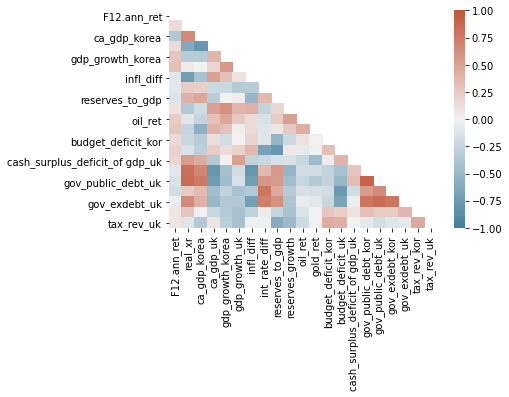

In [36]:
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1)

#### 3. OLS regression

In [37]:
import statsmodels.api as sm

In [38]:
Y = df_sample['F12.ann_ret']

#### (1) Without other factors

In [42]:
X = sm.add_constant(df_sample.iloc[:,1:-11]) #from 2nd column and exclude the last column
X.head()

,const,real_xr,ca_gdp_korea,ca_gdp_uk,gdp_growth_korea,gdp_growth_uk,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth
날짜,,,,,,,,,,
2000-12-31,1.0,0.564045,1.766950,-2.252635,5.7,1.9,1.545422,0.69,16.695862,29.901713
2001-01-31,1.0,0.573129,1.688016,-2.252635,5.7,1.9,2.202196,-0.29,16.560453,23.919662
2001-02-28,1.0,0.589842,1.651829,-2.252635,5.0,1.9,2.388156,-0.11,16.545882,19.575756
2001-03-31,1.0,0.563931,1.866016,-2.147124,5.0,2.5,2.783416,0.37,16.391499,12.906705
2001-04-30,1.0,0.558593,1.919610,-2.147124,5.0,2.5,3.334834,0.81,16.223979,10.478730


In [43]:
res = sm.OLS(Y, X.values).fit()
res.summary(xname=X.columns.tolist())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     35.68
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.21e-38
Time:                        15:30:30   Log-Likelihood:                -695.11
No. Observations:                 234   AIC:                             1410.
Df Residuals:                     224   BIC:                             1445.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.7838      5.548     -6.269      0.000     -45.718     -23.850
real_xr             50.9240      5.426      9.385      0.000      40.231      61.617
ca_gdp_korea        -4.0639      0.305    -13.333      0.000      -4.665      -3.463
ca_gdp_uk           -4.3778      0.616     -7.102      0.000      -5.593      -3.163
gdp_growth_korea    -0.1183      0.257     -0.461      0.646      -0.625       0.388
gdp_growth_uk        1.2320      0.239      5.149      0.000       0.760       1.703
infl_diff            0.5010      0.494      1.013      0.312      -0.473       1.475
int_rate_diff        0.8229      0.349      2.355      0.019       0.134       1.512
reserves_to_gdp     -0.3064      0.170     -1.799      0.073      -0.642       0.029
reserves_growth      0.2586      0.054      4.751      0.000       0.151       0.366
==============================================================================
Omnibus:                        1.607   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.448   Jarque-Bera (JB):                1.597
Skew:                           0.199   Prob(JB):                        0.450
Kurtosis:                       2.925   Cond. No.                         610.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (2) With other factors

In [44]:
X = sm.add_constant(df_sample.iloc[:,1:])

In [45]:
res = sm.OLS(Y, X.values).fit()
res.summary(xname=X.columns.tolist())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     27.58
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           3.05e-48
Time:                        15:30:33   Log-Likelihood:                -649.61
No. Observations:                 234   AIC:                             1341.
Df Residuals:                     213   BIC:                             1414.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -97.3386     31.728     -3.068      0.002    -159.880     -34.797
real_xr                          131.9956     10.477     12.598      0.000     111.343     152.648
ca_gdp_korea                      -2.6544      0.493     -5.379      0.000      -3.627      -1.682
ca_gdp_uk                         -4.4420      0.644     -6.896      0.000      -5.712      -3.172
gdp_growth_korea                  -0.5013      0.278     -1.802      0.073      -1.050       0.047
gdp_growth_uk                      0.8717      0.370      2.358      0.019       0.143       1.601
infl_diff                          0.6778      0.543      1.249      0.213      -0.392       1.747
int_rate_diff                      1.2769      0.760      1.680      0.094      -0.221       2.775
reserves_to_gdp                    0.0678      0.342      0.198      0.843      -0.606       0.742
reserves_growth                    0.2366      0.059      4.037      0.000       0.121       0.352
oil_ret                           -0.0452      0.014     -3.213      0.002      -0.073      -0.017
gold_ret                           0.0005      0.029      0.018      0.986      -0.056       0.057
budget_deficit_kor                 1.3925      0.470      2.961      0.003       0.465       2.320
budget_deficit_uk               -113.7817     36.503     -3.117      0.002    -185.735     -41.828
cash_surplus_deficit_of gdp_uk     0.0265      0.009      3.086      0.002       0.010       0.043
gov_public_debt_kor                0.0012      0.213      0.006      0.995      -0.418       0.420
gov_public_debt_uk                -0.8043      0.121     -6.631      0.000      -1.043      -0.565
gov_exdebt_kor                     0.6525      0.183      3.568      0.000       0.292       1.013
gov_exdebt_uk                      1.7769      1.244      1.429      0.155      -0.675       4.228
tax_rev_kor                       -1.6897      1.108     -1.525      0.129      -3.874       0.494
tax_rev_uk                         1.2293      1.005      1.223      0.223      -0.752       3.211
==============================================================================
Omnibus:                       17.588   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.816
Skew:                           0.519   Prob(JB):                     6.74e-06
Kurtosis:                       4.169   Cond. No.                     2.31e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

#### (3) With meaningful parametar

In [49]:
columns = [
   'real_xr', 'ca_gdp_korea', 'ca_gdp_uk', 'gdp_growth_uk',
   'reserves_growth', 'oil_ret', 'budget_deficit_kor',
   'budget_deficit_uk', 'cash_surplus_deficit_of gdp_uk',
   'gov_public_debt_uk', 'gov_exdebt_kor'
]

In [50]:
X2 = X[['const', *columns]] #* expand the values

In [51]:
res = sm.OLS(Y, X2.values).fit()
res.summary(xname=X2.columns.tolist())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            F12.ann_ret   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     45.02
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           1.91e-50
Time:                        15:31:53   Log-Likelihood:                -661.95
No. Observations:                 234   AIC:                             1348.
Df Residuals:                     222   BIC:                             1389.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -79.8297      6.366    -12.540      0.000     -92.375     -67.285
real_xr                          127.3697     10.079     12.637      0.000     107.507     147.232
ca_gdp_korea                      -2.8244      0.306     -9.219      0.000      -3.428      -2.221
ca_gdp_uk                         -3.4143      0.531     -6.434      0.000      -4.460      -2.369
gdp_growth_uk                      0.5404      0.269      2.009      0.046       0.010       1.071
reserves_growth                    0.2085      0.047      4.449      0.000       0.116       0.301
oil_ret                           -0.0467      0.012     -3.977      0.000      -0.070      -0.024
budget_deficit_kor                 1.6405      0.358      4.577      0.000       0.934       2.347
budget_deficit_uk               -139.9341     26.066     -5.368      0.000    -191.303     -88.565
cash_surplus_deficit_of gdp_uk     0.0212      0.007      3.152      0.002       0.008       0.034
gov_public_debt_uk                -0.6469      0.074     -8.796      0.000      -0.792      -0.502
gov_exdebt_kor                     0.7460      0.132      5.646      0.000       0.486       1.006
==============================================================================
Omnibus:                       10.349   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               17.247
Skew:                           0.227   Prob(JB):                     0.000180
Kurtosis:                       4.250   Cond. No.                     1.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### (4) Compare real & estimated XR

In [52]:
%matplotlib inline

In [53]:
import matplotlib.pyplot as plt

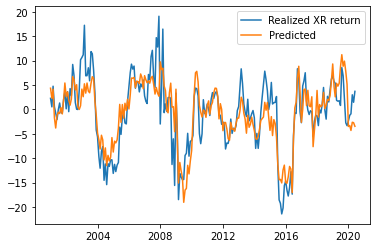

In [54]:
plt.plot(Y, label='Realized XR return')
plt.plot(Y.index, res.predict(), label='Predicted')
plt.legend()
plt.show()

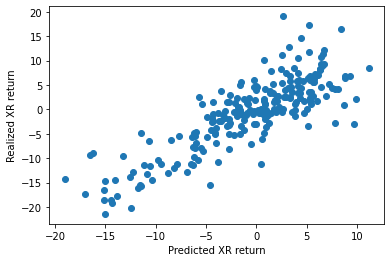

In [55]:
plt.scatter(res.predict(), Y)
plt.xlabel('Predicted XR return')
plt.ylabel('Realized XR return')
plt.show()

#### (5) Forecast XR

In [56]:
last_xr = df_merged['krw_gbp_xr'][-1]

In [57]:
print('Last Exchange Rate: {}'.format(last_xr))

Last Exchange Rate: 1583.21


In [58]:
df_merged.tail(3)

,krw_gbp_xr,krw_gbp_ppp_xr,current_account_korea,current_account_uk,gdp_korea,gdp_uk,gdp_growth_korea,gdp_growth_uk,cpi_korea,cpi_uk,...,gdp_growth_korea2,gdp_growth_uk2,infl_korea,infl_uk,infl_diff,int_rate_diff,reserves_to_gdp,reserves_growth,oil_ret,gold_ret
날짜,,,,,,,,,,,,,,,,,,,,,
2021-03-31,1557.66,1264.358655,85108.3,-99383.23,1642183.9,2827113.2,1.3,-4.7,117.69,121.73,...,0.0,0.0,1.535674,1.012364,0.523310,0.590,27.166713,11.472098,327.744108,5.029134
2021-04-30,1544.55,1264.358655,85108.3,-99383.23,1642183.9,2827113.2,1.3,-4.7,117.94,121.73,...,0.0,0.0,2.325178,1.012364,1.312814,0.542,27.166713,10.432400,273.992269,3.031892
2021-05-31,1583.21,1264.358655,85108.3,-99383.23,1642183.9,2827113.2,1.3,-4.7,117.94,121.73,...,0.0,0.0,2.556522,1.012364,1.544158,0.510,27.166713,9.530020,103.103953,9.665923


In [59]:
last_obs = df_merged.iloc[-1]

In [60]:
exog = last_obs[columns]

In [61]:
exog = [1, *exog]

In [62]:
pred_ret = res.predict(exog=exog)
pred_xr = last_xr * (1 + pred_ret[0]/100)

In [63]:
print('Predicted XR return: {:.2f}%'.format(pred_ret[0]))
print('Predicted XR: {:.2f} to {:.2f}'.format(last_xr, pred_xr))

Predicted XR return: -6.89%
Predicted XR: 1583.21 to 1474.16


In [64]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [65]:
for alpha in [0.05, 0.25, 0.5]:
    prstd, iv_l, iv_u = wls_prediction_std(res, exog=exog, alpha=alpha)
    
    print('Confidence interval at alpha = {:.2f}: {:.2f} ~ {:.2f}'.format(
        alpha, last_xr * (1 + iv_l[0]/100), last_xr * (1 + iv_u[0]/100)
    ))

Confidence interval at alpha = 0.05: 1308.85 ~ 1639.47
Confidence interval at alpha = 0.25: 1377.41 ~ 1570.91
Confidence interval at alpha = 0.50: 1417.49 ~ 1530.83
